# Finding a Good Value BMW: Predicting Re-Sale Prices (notebook II)

## Content of notebook: Extrapolatory date analysis and data cleansing

This notebook analyzes and cleanses the data that were scrapped from the used car website in part I. 

In [15]:
import pandas as pd
import numpy as np
import time
import datetime
import pickle
import copy
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Understanding the scrapped dataset

Taking a look at the set of scrapped raw data:

In [16]:
df_raw = pickle.load(open('pickles/df_raw_BMW116.pkl', 'rb'))
df_raw.head()

,price,registration_date_string,mileage_km,inspection_duedate_string,horse_power_ps,doors_number,gears_type,prior_owners,colour,cylinder_capacity,aircon,fuel_type,environmental_certificate,emission_class,emissions,avg_fuel_cons,fuel_cons_city,fuel_cons_highway
0,9260,05/2013,123787,-,116,5,Schaltgetriebe,1,Alpinweiß(Weiß),1995,Klimaanlage,Diesel,Grün,Euro5,109,410,510,360
1,9395,08/2013,127400,-,116,3,Schaltgetriebe,2,schwarz 2,1995,Klimaautomatik,Diesel,Grün,Euro5,114,430,530,380
2,9480,06/2012,131255,05/2021,136,5,Automatik,1,(grau) Mineralgrau,1598,Klimaanlage,Benzin,Grün,Euro5,131,560,720,470
3,9580,09/2014,111655,-,116,5,Schaltgetriebe,3,Schwarz (SCHWARZ 2),1995,Klimaanlage,Diesel,Grün,Euro5,114,430,530,380
4,9850,06/2012,75450,10/2021,136,5,Schaltgetriebe,3,Alpinweiss (Weiss),1598,Klimaanlage,Benzin,Grün,Euro5,129,550,710,460


In [17]:
df_raw.columns

Index(['price', 'registration_date_string', 'mileage_km',
       'inspection_duedate_string', 'horse_power_ps', 'doors_number',
       'gears_type', 'prior_owners', 'colour', 'cylinder_capacity', 'aircon',
       'fuel_type', 'environmental_certificate', 'emission_class', 'emissions',
       'avg_fuel_cons', 'fuel_cons_city', 'fuel_cons_highway'],
      dtype='object')

In [18]:
df_raw.shape

(517, 18)

In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   price                      517 non-null    object
 1   registration_date_string   517 non-null    object
 2   mileage_km                 517 non-null    object
 3   inspection_duedate_string  517 non-null    object
 4   horse_power_ps             517 non-null    object
 5   doors_number               517 non-null    object
 6   gears_type                 517 non-null    object
 7   prior_owners               517 non-null    object
 8   colour                     517 non-null    object
 9   cylinder_capacity          517 non-null    object
 10  aircon                     517 non-null    object
 11  fuel_type                  517 non-null    object
 12  environmental_certificate  517 non-null    object
 13  emission_class             517 non-null    object
 14  emissions 

### Cleansing the dataset

#### Removing rows with expired ads

In [20]:
df_filtered = df_raw.loc[df_raw['mileage_km'] != 'expired'].copy()
df_filtered.head()

,price,registration_date_string,mileage_km,inspection_duedate_string,horse_power_ps,doors_number,gears_type,prior_owners,colour,cylinder_capacity,aircon,fuel_type,environmental_certificate,emission_class,emissions,avg_fuel_cons,fuel_cons_city,fuel_cons_highway
0,9260,05/2013,123787,-,116,5,Schaltgetriebe,1,Alpinweiß(Weiß),1995,Klimaanlage,Diesel,Grün,Euro5,109,410,510,360
1,9395,08/2013,127400,-,116,3,Schaltgetriebe,2,schwarz 2,1995,Klimaautomatik,Diesel,Grün,Euro5,114,430,530,380
2,9480,06/2012,131255,05/2021,136,5,Automatik,1,(grau) Mineralgrau,1598,Klimaanlage,Benzin,Grün,Euro5,131,560,720,470
3,9580,09/2014,111655,-,116,5,Schaltgetriebe,3,Schwarz (SCHWARZ 2),1995,Klimaanlage,Diesel,Grün,Euro5,114,430,530,380
4,9850,06/2012,75450,10/2021,136,5,Schaltgetriebe,3,Alpinweiss (Weiss),1598,Klimaanlage,Benzin,Grün,Euro5,129,550,710,460


#### Setting the right variable format

Convert strings into numerical variables for price, mileage, horse power, number doors, prior owners, cylinder capacity, ... 

In [21]:
# Note: doors_number will intentionally be considered a categorical variable
variables_to_integers = ['price', 'mileage_km', 'horse_power_ps', 'prior_owners', 'cylinder_capacity', 'emissions', 'avg_fuel_cons', 'fuel_cons_city', 'fuel_cons_highway']

for variable in variables_to_integers:
    df_filtered[variable] = pd.to_numeric(df_filtered[variable],errors='coerce')

In [22]:
# The three variables related to fuel consumption still need to be divided by 100 to offest removal of comma during data scrapping
variables_to_divide = ['avg_fuel_cons', 'fuel_cons_city', 'fuel_cons_highway']

for variable in variables_to_divide:
    df_filtered[variable] = pd.to_numeric(df_filtered[variable], errors='coerce').div(100)

#### Replacing missing values

##### Metric variables: Replace with feature mean

<span style="color: red;"> Metric variables: Replace with feature mean </span>




In [23]:
objects_to_mean = ['cylinder_capacity', 'emissions', 'avg_fuel_cons', 'fuel_cons_city', 'fuel_cons_highway']

for object in objects_to_mean:
    df_filtered[object]=df_filtered[object].replace(np.nan, df_filtered[object].mean())

##### Categorical variables: Identify suitable replacement value

In [24]:
# overview of categorical variables
list(df_filtered.select_dtypes(include='object').columns)

['registration_date_string',
 'inspection_duedate_string',
 'doors_number',
 'gears_type',
 'colour',
 'aircon',
 'fuel_type',
 'environmental_certificate',
 'emission_class']

**Feature: Number of doors:**

In [25]:
df_filtered.doors_number.value_counts()

5    429
3     43
-     34
4      8
2      3
Name: doors_number, dtype: int64

In [26]:
mode_number_doors = df_filtered.doors_number.mode()[0]

In [27]:
# Replace missing values with mode
df_filtered.doors_number.replace(np.nan, mode_number_doors, inplace=True)
df_filtered.doors_number.replace('-', mode_number_doors, inplace=True)

*Further observation: The ads showing 2 or 4 doos must be a mistake since in Germany, the convention is to count the trunk as a door. So for all ads that display 2 doors, the value will be set to 3 doors (and 5 instead of 4). Furthermore, the '-' door will be set to 5.*

In [28]:
df_filtered.doors_number.replace('2','3', inplace=True)

In [29]:
df_filtered.doors_number.replace('4','5', inplace=True)

**Feature: Prior owners**

In [30]:
print(df_filtered.prior_owners.mode())

0    1.0
dtype: float64


In [31]:
df_filtered.prior_owners.replace(np.nan, 1,inplace=True)

**Feature: Gears**

In [32]:
# repalce with mode
df_filtered.gears_type.value_counts()

Schaltgetriebe    459
Automatik          57
-                   1
Name: gears_type, dtype: int64

In [33]:
df_filtered.gears_type.replace(np.nan, 'Schaltgetriebe', inplace=True)
df_filtered.gears_type.replace('-','Schaltgetriebe', inplace=True)

**Feature: Color**

In [34]:
df_filtered.colour.value_counts().head(10).sum()

269

In [35]:
df_filtered['colour'].nunique()

126

It seems that there is no convention on how to name the colour of the cars. Within 517 ads, there are 126 unique colours. The top 10 colours appear in 269 ads, representing only about a fourth of all ads.

For the MVP, the colour will not be included as a feature. It might still be added on later on - after grouping the colors in a meaningful way.

**Feature: aircon**

In [36]:
df_filtered.aircon.value_counts()

Klimaautomatik    392
Klimaanlage        83
Keine              42
Name: aircon, dtype: int64

**Feature: Fuel type**

In [37]:
df_filtered.fuel_type.value_counts()
# need to deal with missing values

Benzin    310
Diesel    206
-           1
Name: fuel_type, dtype: int64

In [38]:
df_filtered.fuel_type.replace('-','Benzin', inplace=True)

**Feature: Environmental certificate**

In [39]:
df_filtered.environmental_certificate.value_counts()
# need to deal with missing values

Grün    454
-        63
Name: environmental_certificate, dtype: int64

In [40]:
df_filtered.environmental_certificate.replace('-','Not_mentioned', inplace=True)

**Feature: Emission class**

In [41]:
df_filtered.emission_class.value_counts()

Euro6    421
Euro5     51
-         45
Name: emission_class, dtype: int64

In [42]:
# Assumption is that if emission class is not mentioned, it is probably the worse one
df_filtered.emission_class.replace('-','Euro5', inplace=True)

#### Convert time related variables

The variables **registration_date_string** and **inspection_duedate_string** still need to be converted from a string into dates in order to then **calculate the age of the car** and the **years until next mandatory inspection** respectively.

##### Age of car

**Replace missing values of 'registration_date':**

In [43]:
print("Most frequent registration dates: {}".format(df_filtered['registration_date_string'].value_counts().idxmax())) 
print(df_filtered.registration_date_string.value_counts())

Most frequent registration dates: 12/2016
12/2016    59
11/2016    50
09/2016    33
01/2017    28
08/2016    24
           ..
06/2015     1
08/2017     1
01/2014     1
10/2017     1
12/2014     1
Name: registration_date_string, Length: 81, dtype: int64


<AxesSubplot:>

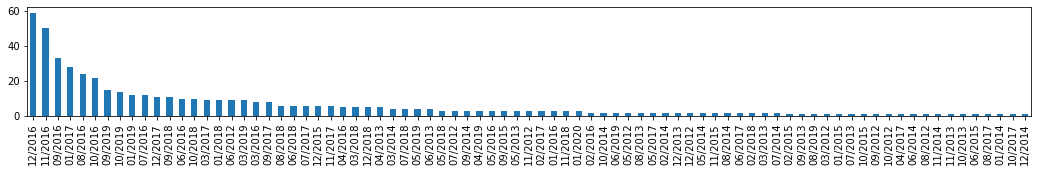

In [44]:
plt.figure(figsize = [18,2])
df_filtered['registration_date_string'].value_counts().plot(kind='bar')
# This is not so meaningful because the dates are not properly sorted

In [45]:
df_filtered.registration_date_string.replace('-','12/2016', inplace=True)

**Convert 'registration_date' to datetime:**

In [46]:
df_filtered['registration_date'] = df_filtered['registration_date_string'].map(lambda x: datetime.datetime.strptime(x, "%m/%Y"))

In [47]:
# Double check that registration_date is now in datetime format
type(df_filtered.registration_date[0])

pandas._libs.tslibs.timestamps.Timestamp

**Calculate 'car_age':**

In [48]:
# Care age is time when data was scrapped - registration date
df_filtered['time_of_scrapping']= datetime.datetime(2020,2,1)

In [49]:
df_filtered['car_age'] = df_filtered['time_of_scrapping'] - df_filtered.registration_date

In [50]:
df_filtered['car_age'] = df_filtered['car_age'].map(lambda x: x.days)/365.25

In [51]:
# Time of scrapping is no longer needed
del df_filtered['time_of_scrapping']

##### Next inspection date

In [52]:
print("Most frequent inspection due dates: {}".format(df_filtered['inspection_duedate_string'].value_counts().idxmax())) 

Most frequent inspection due dates: -


<AxesSubplot:>

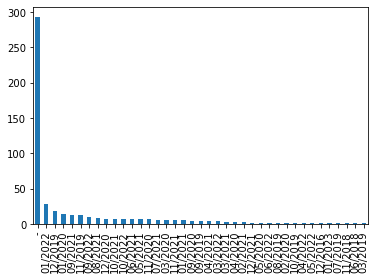

In [53]:
df_filtered.inspection_duedate_string.value_counts().plot(kind='bar')

**Conclusion:** The next inspection due date is a missing value in the majority of adds. Therefore, it will be excluded from the model.

### Analyze and replace outliers 

In [54]:
df_filtered.describe()

,price,mileage_km,horse_power_ps,prior_owners,cylinder_capacity,emissions,avg_fuel_cons,fuel_cons_city,fuel_cons_highway,car_age
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,16614.955513,42135.874275,114.295938,1.189555,1521.100775,116.037402,4.782178,5.887525,4.141188,3.170188
std,5043.244328,28977.847897,7.699003,0.416295,113.687648,11.219126,0.705762,1.085735,0.490497,1.695959
min,9260.000000,10.000000,109.000000,1.000000,4.000000,89.000000,3.400000,3.900000,3.000000,0.084873
25%,13900.000000,20483.000000,109.000000,1.000000,1496.000000,107.000000,4.100000,4.700000,3.600000,2.168378
50%,15300.000000,37666.000000,109.000000,1.000000,1499.000000,116.000000,5.000000,6.300000,4.200000,3.167693
75%,17795.000000,58518.000000,116.000000,1.000000,1499.000000,123.000000,5.300000,6.700000,4.500000,3.501711
max,38797.000000,149840.000000,136.000000,3.000000,1995.000000,140.000000,5.900000,7.500000,5.100000,7.920602


**Insight:** There seems to be an outlier with regards to cylinder_capacity (minimum value is much lower than quartiles).

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 447.,   1.,  51.,   0.,
          0.,   0.,  17.]),
 array([   4.  ,   83.64,  163.28,  242.92,  322.56,  402.2 ,  481.84,
         561.48,  641.12,  720.76,  800.4 ,  880.04,  959.68, 1039.32,
        1118.96, 1198.6 , 1278.24, 1357.88, 1437.52, 1517.16, 1596.8 ,
        1676.44, 1756.08, 1835.72, 1915.36, 1995.  ]),
 <BarContainer object of 25 artists>)

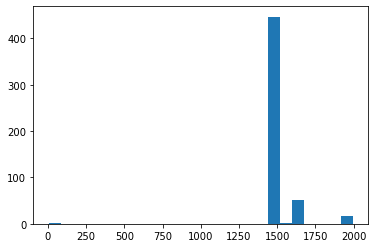

In [55]:
plt.hist(df_filtered.cylinder_capacity, 25)

In [56]:
# FYI: Identify observations that seem to be outliers with regards to the feature in question
df_filtered.loc[df_filtered.cylinder_capacity <=1000, 'cylinder_capacity']

307    4.0
Name: cylinder_capacity, dtype: float64

In [57]:
# Replacement value is average cylinder capacity excluding outliers
replacement_cylinder_capacity = df_filtered.loc[df_filtered.cylinder_capacity >=1000, 'cylinder_capacity'].mean()

In [58]:
df_filtered.loc[df_filtered.cylinder_capacity <=1000, 'df_filtered.cylinder_capacity'] = replacement_cylinder_capacity

### Summary of data cleansing

**Pickle the cleansed dataframe for the linear regression**. The cleansed dataset for the linear regression model contains the original variables that were scrapped and cleansed (replace missing values, transform into appropriate format) except for:

  * **Removed** variable **colour** since there is no naming convention
  
  * **Removed** variable next inspection due date due to too many missing values
  
  * **Replaced** variable **registration date** with **car age**
  
  * **Remove** variable **environmental_certificate** since this model always has the same 

*Note: In a textbook solution, the replacement of missing values with means or modes would be performed in the train, validation and test datasets separately in order to avoid data leakage. However, in this case, the risk of data leakage distorting the model appears low - thus, in oder to keep the notebook readable, this is done in one step.*

In [59]:
df_lrm_BMW116 = copy.deepcopy(df_filtered.loc[:,['price', 'mileage_km',
       'horse_power_ps', 'car_age', 'doors_number',
       'gears_type', 'prior_owners', 'cylinder_capacity', 'aircon',
       'fuel_type', 'emission_class', 'emissions',
       'avg_fuel_cons', 'fuel_cons_city', 'fuel_cons_highway']]).reset_index()
df_lrm_BMW116.head(10)

,index,price,mileage_km,horse_power_ps,car_age,doors_number,gears_type,prior_owners,cylinder_capacity,aircon,fuel_type,emission_class,emissions,avg_fuel_cons,fuel_cons_city,fuel_cons_highway
0,0,9260,123787,116,6.754278,5,Schaltgetriebe,1.0,1995.0,Klimaanlage,Diesel,Euro5,109.0,4.1,5.1,3.6
1,1,9395,127400,116,6.502396,3,Schaltgetriebe,2.0,1995.0,Klimaautomatik,Diesel,Euro5,114.0,4.3,5.3,3.8
2,2,9480,131255,136,7.668720,5,Automatik,1.0,1598.0,Klimaanlage,Benzin,Euro5,131.0,5.6,7.2,4.7
3,3,9580,111655,116,5.418207,5,Schaltgetriebe,3.0,1995.0,Klimaanlage,Diesel,Euro5,114.0,4.3,5.3,3.8
4,4,9850,75450,136,7.668720,5,Schaltgetriebe,3.0,1598.0,Klimaanlage,Benzin,Euro5,129.0,5.5,7.1,4.6
5,5,9860,98000,136,7.668720,5,Schaltgetriebe,2.0,1598.0,Klimaanlage,Benzin,Euro5,125.0,5.4,7.0,4.5
6,6,9920,100000,136,6.836413,3,Schaltgetriebe,1.0,1598.0,Klimaanlage,Benzin,Euro6,125.0,5.5,7.2,4.6
7,7,9920,94635,136,7.586585,5,Schaltgetriebe,1.0,1598.0,Klimaanlage,Benzin,Euro5,130.0,5.5,7.1,4.6
8,8,9960,82000,116,7.249829,5,Schaltgetriebe,1.0,1598.0,Klimaanlage,Diesel,Euro5,99.0,3.8,4.4,3.4
9,9,9980,81664,136,7.920602,5,Schaltgetriebe,1.0,1598.0,Klimaautomatik,Benzin,Euro5,129.0,5.5,7.1,4.6


In [60]:
df_lrm_BMW116.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              517 non-null    int64  
 1   price              517 non-null    int64  
 2   mileage_km         517 non-null    int64  
 3   horse_power_ps     517 non-null    int64  
 4   car_age            517 non-null    float64
 5   doors_number       517 non-null    object 
 6   gears_type         517 non-null    object 
 7   prior_owners       517 non-null    float64
 8   cylinder_capacity  517 non-null    float64
 9   aircon             517 non-null    object 
 10  fuel_type          517 non-null    object 
 11  emission_class     517 non-null    object 
 12  emissions          517 non-null    float64
 13  avg_fuel_cons      517 non-null    float64
 14  fuel_cons_city     517 non-null    float64
 15  fuel_cons_highway  517 non-null    float64
dtypes: float64(7), int64(4), o

In [63]:
del df_lrm_BMW116['index']

In [64]:
with open('pickles/df_lrm_BMW116.pkl', 'wb') as f:
    pickle.dump(df_lrm_BMW116, f)